In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [28]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [29]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


##### merge both train and test

In [30]:
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [32]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


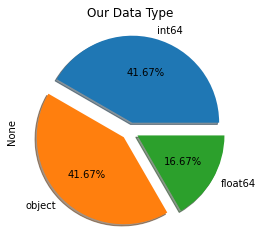

In [33]:
df_train.dtypes.value_counts().plot.pie(explode = [0.1,0.1,0.1],
                                    autopct = '%1.2f%%', shadow = True)
plt.title("Our Data Type");

Text(0.5, 1.0, 'Gender Per Transaction')

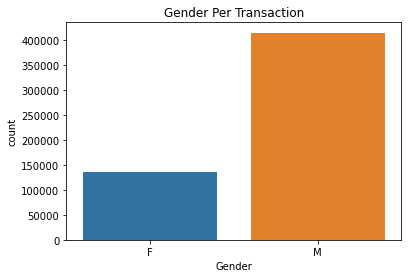

In [34]:
sns.countplot(x = df_train.Gender)
plt.title("Gender Per Transaction")

In [35]:
# Create a correlation matrix
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


In [36]:
df.drop(['User_ID'], inplace=True,axis=1)

In [37]:
pd.get_dummies(df['Gender'], drop_first=True).head()

,M
0,0
1,0
2,0
3,0
4,1


In [38]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [39]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [40]:
#handle categorical feature age

In [41]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [42]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

##### second technique label encoding



##### from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Age'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

In [43]:
df.head(20)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
5,P00193542,1,3,15,A,3,0,1,2.0,NaN,15227.0
6,P00184942,1,5,7,B,2,1,1,8.0,17.0,19215.0
7,P00346142,1,5,7,B,2,1,1,15.0,NaN,15854.0
8,P0097242,1,5,7,B,2,1,1,16.0,NaN,15686.0
9,P00274942,1,3,20,A,1,1,8,NaN,NaN,7871.0


In [44]:
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [45]:
df = pd.concat([df,df_city],axis=1)

In [46]:
df.drop('City_Category', axis=1, inplace= True)

In [47]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [48]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [49]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [50]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [51]:
df['Product_Category_2'].isnull().sum()

0

In [52]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [53]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [54]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [55]:
df['Product_Category_3'].isnull().sum()

0

In [56]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [57]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.str.rstrip('+')
#Another way 
#df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [58]:
#convert obj to int
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.astype(int)

In [59]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [60]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [61]:
#sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

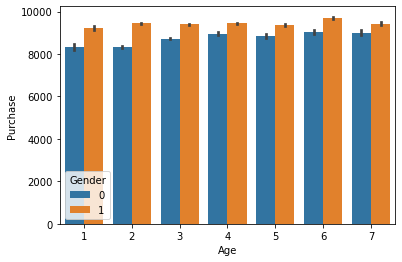

In [62]:
# visualization of Age and Purchase
sns.barplot(x='Age',y='Purchase', data= df, hue='Gender')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

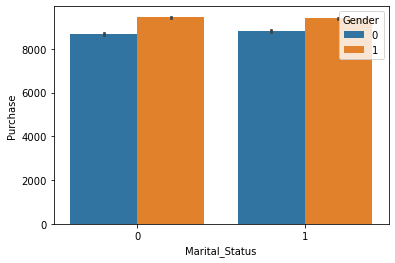

In [63]:
# visualization of Marital Status and Purchase
sns.barplot('Marital_Status','Purchase',data=df, hue= 'Gender')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

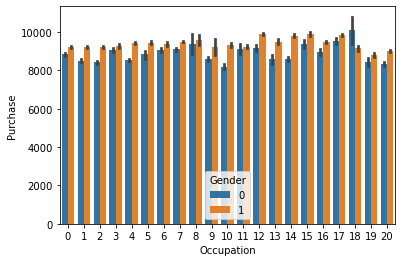

In [64]:
# visualization of Occupation and Purchase
sns.barplot('Occupation', 'Purchase', data=df, hue='Gender')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

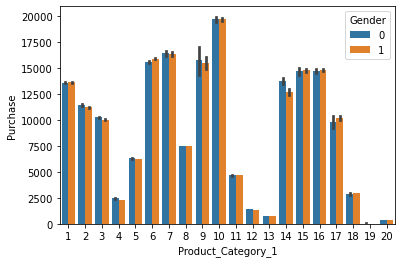

In [65]:
sns.barplot('Product_Category_1','Purchase',data=df,hue='Gender')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

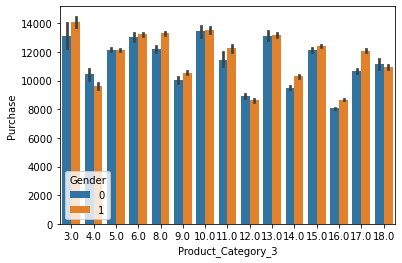

In [66]:
sns.barplot('Product_Category_3','Purchase',data=df,hue='Gender')

In [67]:
df.shape

(783667, 12)

In [68]:
## Feature Scaling
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [69]:
df_test.shape

(233599, 12)

In [70]:
df_train.shape

(550068, 12)

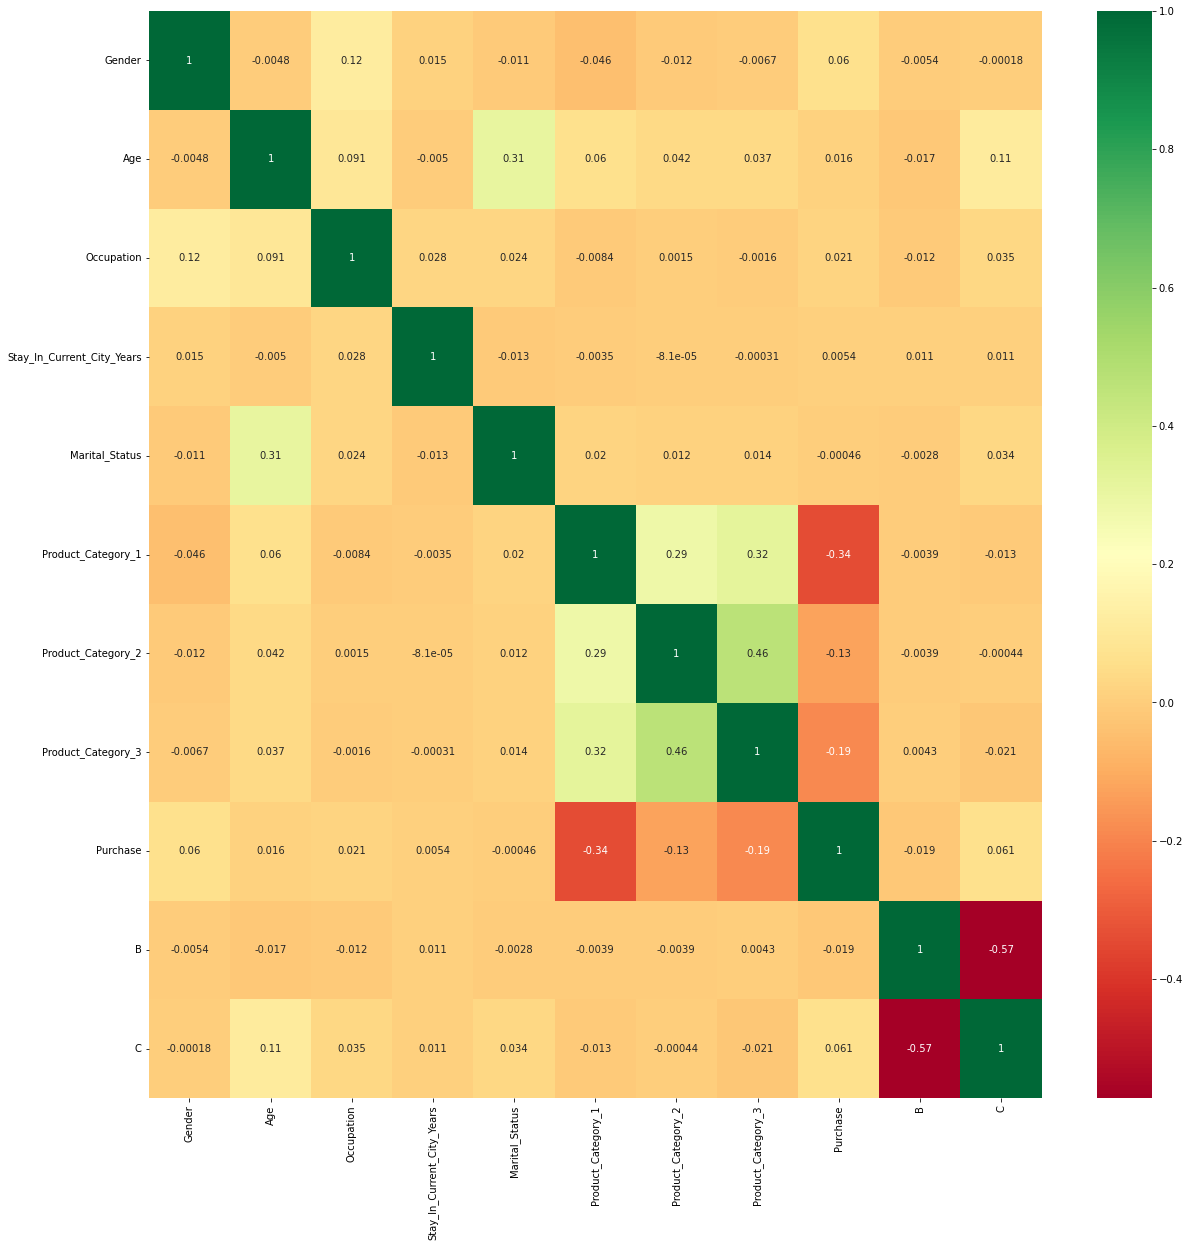

In [71]:
#correlation through heat map
corr_mat = df.corr()
top_corr_features = corr_mat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [72]:
#Train test parameter
X=df_train.drop('Purchase', axis=1)

In [73]:
y= df_train['Purchase']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
X_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,P00120042,1,2,14,3,0,1,2.0,16.0,1,0
433826,P00058042,1,6,0,0,1,8,16.0,16.0,0,0
516298,P0095842,1,4,17,0,0,3,4.0,12.0,0,1
193380,P00010842,1,3,4,1,0,8,16.0,16.0,1,0
273542,P00058242,0,4,20,3,1,3,4.0,12.0,1,0


In [76]:
X_train.drop('Product_ID',inplace=True,axis=1)
X_test.drop('Product_ID',inplace=True,axis=1)

In [77]:
# Create a correlation matrix of test data
corr_metrics = X_train.corr()
corr_metrics.style.background_gradient()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
Gender,1.000000,-0.005141,0.116629,0.015532,-0.012298,-0.045586,-0.012205,-0.005638,-0.007219,0.001548
Age,-0.005141,1.000000,0.092132,-0.003944,0.313151,0.063150,0.040654,0.036353,-0.019400,0.109986
Occupation,0.116629,0.092132,1.000000,0.028626,0.024105,-0.007533,0.001373,0.000383,-0.012161,0.035119
Stay_In_Current_City_Years,0.015532,-0.003944,0.028626,1.000000,-0.013322,-0.002896,-0.000186,0.001316,0.013276,0.010279
Marital_Status,-0.012298,0.313151,0.024105,-0.013322,1.000000,0.020888,0.009996,0.014025,-0.003011,0.032890
Product_Category_1,-0.045586,0.063150,-0.007533,-0.002896,0.020888,1.000000,0.279486,0.318032,-0.006328,-0.008045
Product_Category_2,-0.012205,0.040654,0.001373,-0.000186,0.009996,0.279486,1.000000,0.462527,-0.003672,-0.001576
Product_Category_3,-0.005638,0.036353,0.000383,0.001316,0.014025,0.318032,0.462527,1.000000,0.004110,-0.020409
B,-0.007219,-0.019400,-0.012161,0.013276,-0.003011,-0.006328,-0.003672,0.004110,1.000000,-0.572277
C,0.001548,0.109986,0.035119,0.010279,0.032890,-0.008045,-0.001576,-0.020409,-0.572277,1.000000


In [78]:
##feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit_transform(X_train)
scale.transform(X_test)

array([[ 0.57141282,  1.84716932,  1.67542193, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [-1.75004823,  0.37105599,  0.44863199, ...,  0.36891877,
         1.17569512, -0.67282374],
       [-1.75004823,  0.37105599, -1.23820419, ...,  0.36891877,
        -0.85056064, -0.67282374],
       ...,
       [ 0.57141282, -1.10505734, -0.93150671, ...,  0.36891877,
        -0.85056064,  1.48627336],
       [ 0.57141282,  0.37105599, -0.16476299, ...,  0.00373169,
        -0.85056064,  1.48627336],
       [ 0.57141282, -1.10505734, -0.62480922, ...,  0.36891877,
         1.17569512, -0.67282374]])

In [79]:
X_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,2,14,3,0,1,2.0,16.0,1,0
433826,1,6,0,0,1,8,16.0,16.0,0,0
516298,1,4,17,0,0,3,4.0,12.0,0,1
193380,1,3,4,1,0,8,16.0,16.0,1,0
273542,0,4,20,3,1,3,4.0,12.0,1,0


In [80]:
#model training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
linear = LinearRegression()
linear.fit(X_train,y_train)
y_pred = linear.predict(X_test)
#print(y_pred)
#print(y_test)
linear.score(X_test, y_test)

0.12948768560712398

In [81]:
print('Intercept parameter:', linear.intercept_)
coeff_df = pd.DataFrame(linear.coef_ , X_train.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 12652.75205902996
                            Coefficient
Gender                       509.336468
Age                          119.184337
Occupation                     6.249265
Stay_In_Current_City_Years    10.080574
Marital_Status               -59.774559
Product_Category_1          -405.303325
Product_Category_2            -1.455491
Product_Category_3          -153.980764
B                            154.747961
C                            673.265656


In [82]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MAE: 3577.2377941857
MSE: 21939163.32153542


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


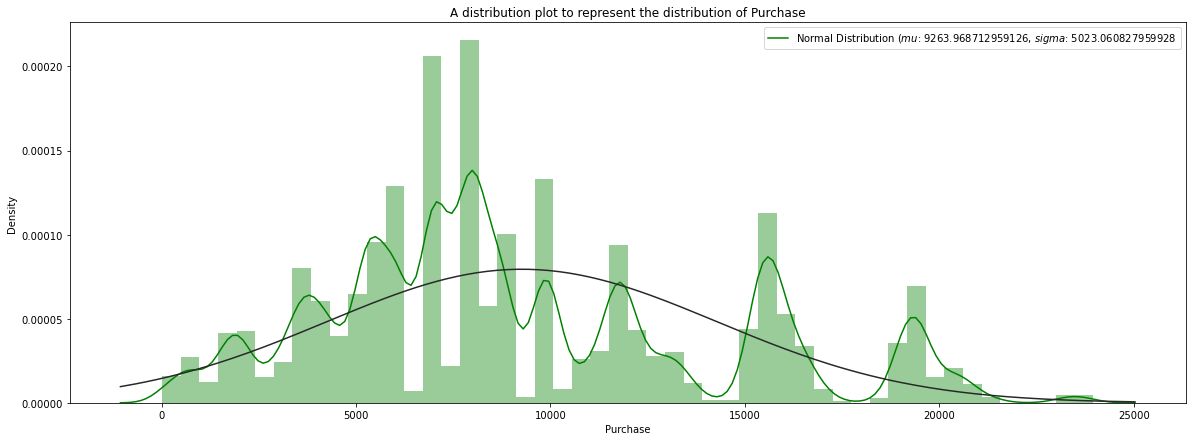

In [83]:
# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(y, color = 'green', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(y) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

In [84]:
#lasso training
from sklearn.linear_model import Lasso
laso=Lasso(alpha=10)
laso.fit(X_train,y_train)
print(laso.score(X_train,y_train))
laso.score(X_test,y_test)

0.131977932343053


0.12935565202387367

In [85]:
print('Intercept parameter:', laso.intercept_)
coeff_df = pd.DataFrame(laso.coef_ , X_train.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 12766.346611818986
                            Coefficient
Gender                       454.857210
Age                          110.873011
Occupation                     6.699992
Stay_In_Current_City_Years     5.395668
Marital_Status                -9.282224
Product_Category_1          -405.314153
Product_Category_2            -1.245403
Product_Category_3          -153.109443
B                             56.630921
C                            567.824973


In [86]:
print('MAE:', metrics.mean_absolute_error(y_test, laso.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test,laso.predict(X_test) ))

MAE: 3576.6423721193296
MSE: 21942490.90955337


In [87]:
#Ridge regression
from sklearn.linear_model import Ridge
rig=Ridge(alpha=10000)
rig.fit(X_train,y_train)
print(rig.score(X_train,y_train))
rig.score(X_test,y_test)

0.13199823696459811


0.12936982266644914

In [88]:
print('Intercept parameter:', rig.intercept_)
coeff_df = pd.DataFrame(rig.coef_ , X_train.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 12753.498418481282
                            Coefficient
Gender                       443.066917
Age                          119.924434
Occupation                     6.944364
Stay_In_Current_City_Years    10.973413
Marital_Status               -52.157710
Product_Category_1          -405.081586
Product_Category_2            -1.722971
Product_Category_3          -153.767793
B                             83.500580
C                            558.441376


In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, rig.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, rig.predict(X_test) ))

MAE: 3576.5982345787747
MSE: 21942133.77268501
